Training and Validation risk for 10 learning rate
Learning rates:0.000001,0.000005,0.00001,0.00002,0.000025,0.00003,0.000035,0.00005,0.0001,0.001
calculating risks for 1e-06
calculating Validation risk for 1e-06
calculating Training risk for 1e-06
calculating risks for 5e-06
calculating Validation risk for 5e-06
calculating Training risk for 5e-06
calculating risks for 1e-05
calculating Validation risk for 1e-05
calculating Training risk for 1e-05
calculating risks for 2e-05
calculating Validation risk for 2e-05
calculating Training risk for 2e-05
calculating risks for 2.5e-05
calculating Validation risk for 2.5e-05
calculating Training risk for 2.5e-05
calculating risks for 3e-05
calculating Validation risk for 3e-05
calculating Training risk for 3e-05
calculating risks for 3.5e-05
calculating Validation risk for 3.5e-05
calculating Training risk for 3.5e-05
calculating risks for 5e-05
calculating Validation risk for 5e-05
calculating Training risk for 5e-05
calculating risks for 0.00

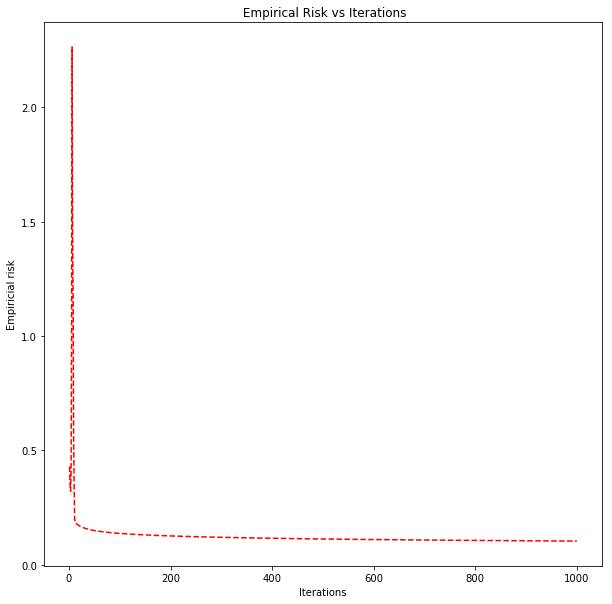

Iteration which produces least empirical risk: 1000
Test Risk of the best model: 0.118562470167

Note:
Test Risk: 0.118562470167 and Validation error: 0.12600921748 are close
Empirical Risk reduces as iterations increase as expected


In [2]:
from numpy import loadtxt
import numpy as np
import math
import matplotlib.pyplot as plt

#Loading Data Files
#Features
trainingData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW3/DataFiles/trainingData.txt", delimiter=",",unpack=False,dtype=np.float128)
testData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW3/DataFiles/testData.txt", delimiter=",", unpack=False,dtype=np.float128)
validationData = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW3/DataFiles/validationData.txt", delimiter=",",unpack=False,dtype=np.float128)

#Labels
trainingLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW3/DataFiles/trainingLabels.txt",unpack=False)
testLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW3/DataFiles/testLabels.txt",unpack=False)
validationLabels = loadtxt("/Users/jayavardhanreddy/Python_Code/ML/HW3/DataFiles/validationLabels.txt",unpack=False)

#Function to calculate gradient
def calculate_gradient(w):
    x=trainingData
    y=trainingLabels
    gradient=0
    N=len(y)
    for xi,yi in zip(x,y):
        product=yi*np.dot(w,np.transpose(xi))
        if product>=0:
            exponential=(np.exp(-1*product))
            scalar=((-1*yi)/N)*(exponential/(1+exponential))
        else:
            scalar=((-1*yi)/N)*(1/(1+np.exp(1*product)))
        gradient+=(scalar)*(xi)
    return gradient

#Main Function for Gradient Descent
def gradient_descent(T,learning_rate):
    w=np.zeros((1,784), dtype=np.float128)
    for t in range(1,T+1):
        gradient=calculate_gradient(w)
        w-=(learning_rate*gradient)
    return w

#Function to calculate Risk
def calculate_risk(w,x,y,debug=False):
    predictions=np.dot(x,np.transpose(w))
    y=y.reshape((len(y),1))
    log_value=np.log(1+np.exp(-1*np.multiply(y,predictions)))/(len(y))
    risk=np.sum(log_value,dtype=np.float128)
    return risk

#10 different Learning rates
#Training and Validation risk for each learning rate
print('Training and Validation risk for 10 learning rates')
print('Learning rates:0.000001,0.000005,0.00001,0.00002,0.000025,0.00003,0.000035,0.00005,0.0001,0.001')

validation_risk_dictionary={}
training_risk_dictionary={}
T=1000
for learning_rate in [0.000001,0.000005,0.00001,0.00002,0.000025,0.00003,0.000035,0.00005,0.0001,0.001]:
    print('Gradient Descent for',learning_rate)
    w=gradient_descent(T,learning_rate)
    print('calculating Validation risk for',learning_rate)
    validation_risk=calculate_risk(w,validationData,validationLabels)
    validation_risk_dictionary[learning_rate]=validation_risk
    print('calculating Training risk for',learning_rate)
    training_risk=calculate_risk(w,trainingData,trainingLabels)
    training_risk_dictionary[learning_rate]=training_risk

print('Training Risk for 10 Learning Rates')
print(training_risk_dictionary)

print('Validation Risk for 10 Learning Rates')
print(validation_risk_dictionary)

#Learning_rate which yields least validation_error
learning_rate=min(validation_risk_dictionary, key=validation_risk_dictionary.get)
print("learning_rate for least validation risk",learning_rate)
print('validation risk for learning rate',learning_rate,'is:',validation_risk_dictionary[learning_rate])

#Function used to generate list of empirical risk for iterations 1 to 1000
def Empiricial_risk_vs_iterations(T,learning_rate):
    w=np.zeros((1,784), dtype=np.float128)
    list_empirical_risk=[]
    for t in range(1,T+1):
        gradient=calculate_gradient(w)
        w-=(learning_rate*gradient)
        empirical_risk=calculate_risk(w,trainingData,trainingLabels)
        list_empirical_risk.append(empirical_risk)
    return list_empirical_risk

#list of empirical risk values, for iterations from 1 to 1000
T=1000
list_empirical_risk=Empiricial_risk_vs_iterations(T,learning_rate)

#Plot Empirical Risk vs Iterations
plt.figure(figsize=(10,10))
plt.plot(range(1,1001), list_empirical_risk, 'r--')
plt.ylabel('Empiricial risk')
plt.xlabel('Iterations')
plt.title(' Empirical Risk vs Iterations')
plt.show()

#Find number of iterations which gives minimum risk 
number_of_iterations=list_empirical_risk.index(min(list_empirical_risk))+1
print("Iteration which produces least empirical risk:",number_of_iterations)

#Final Model
#Best model using the learning rate and number_of_iterations found
w=gradient_descent(number_of_iterations,learning_rate)
test_risk=calculate_risk(w,testData,testLabels)
print("best model: learning rate:",learning_rate,'iterations:',number_of_iterations)
print('Test Risk of the best model:',test_risk)

print('\nNote:')
print('Test Risk:',test_risk, 'and Validation error:', validation_risk_dictionary[learning_rate],'are close')
print('Empirical Risk reduces as iterations increase as expected')